In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["pdf.fonttype"] = 42

In [2]:
import seaborn as sb
import numpy as np
from  scipy.stats import ranksums

In [3]:
meta_df = pd.read_excel("data/Supplemental_Tables.xlsx", sheet_name="Table S1", skiprows=[0,1], index_col=0)
meta_df

,Age,Stage_2009_adj,Grade_subtype1,Histology from clinical data,mRNAseq_data,WES_data,VCS_data,proteinomics_data,photo_data,scRNA_data,...,DNA HPV type,RNA HPV type,DNA HPV integrate,RNA HPV integrate,Inregration status,RNA HPV CPM,RNA HPV count,Unspliced E6,Spliced E6,DNA-RNA models
Patient,,,,,,,,,,,,,,,,,,,,,
MOCC-0001,48,IIB,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,215.01,10312.0,36.0,330.0,intronic-intronic
MOCC-0002,57,IIB,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,1.89,65.0,0.0,33.0,intergenic-intergenic
MOCC-0003,66,IIA1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,14.62,641.0,13.0,220.0,intergenic-intergenic
MOCC-0004,53,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV34;HPV16,HPV34,Y,Y,Productive integrated,353.75,13361.0,NaN,NaN,intronic-exonic
MOCC-0005,40,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,13.54,672.0,30.0,245.0,intronic-exonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC04,71,IB2,G3,squamous,Yes,No,No,No,No,Yes,...,NaN,HPV16,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
CC05,53,IIA1,G3,squamous,Yes,No,No,No,No,Yes,...,NaN,HPV16,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
CC06,52,IIA,G2,squamous,Yes,No,No,No,No,Yes,...,NaN,HPV16,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dna_df = pd.read_excel("data/Supplemental_Tables.xlsx", sheet_name="Table S2", skiprows=[0,1])
dna_df

,Sample,HPV type integrated,HPV integration location,Human chromosome integrated,Human integration location,Human integration strand,Integration type,Reads,Seq,Inregration status
0,MOCC-0001-B,HPV16,3860,chr2,201072920,-,hpv-human,818,ATTATGTCCTACATCTGTGTTTAGCAGCAACGAAGTATCCTCTCCT...,Silent
1,MOCC-0001-B,HPV16,3297,chr2,201063497,-,human-hpv,472,TCCTCCCTTCACGGGTCCAAAATTTGAAGACTGATTTTTGTAATTG...,Productive
2,MOCC-0001-B,HPV16,5917,chr2,201035002,-,human-hpv,362,GCTCCTCACCAGCAATGGAACAAAGCTGGACGGAGAATGACTTTGA...,Productive
3,MOCC-0001-B,HPV16,209,chr2,201056607,-,human-hpv,249,TCAAAAGCCAAGCAAGGAGCTATTTCTCAAAAGAAGAGCAATCATC...,Productive
4,MOCC-0001-B,HPV16,3467,chr2,201066970,-,hpv-human,152,TAAACATATTAACCACCAAGTGGTGCCAACACTGGCTGTATCAAAG...,Silent
...,...,...,...,...,...,...,...,...,...,...
757,MOCC-0032-B,HPV16,3634,chr10,51110291,+,human-hpv,49,ATTTCACCAAAGAGGATATATGAAAAGCAAATAAGCATATGAACAA...,Silent
758,MOCC-0032-B,HPV18,2705,chr7,140198110,+,hpv-human,10,GTGAATTCCACTAGTCATTTTTGGTTGGAACCGTTAACAGATACTA...,Silent
759,MOCC-0034-B,HPV58,3328,chr4,150420985,-,hpv-human,2785,TTTCCATTTGATGCAAATGGTAATCCAGTGTATAAAATAAATGATG...,Productive
760,MOCC-0034-B,HPV58,3631,chr4,150852347,-,human-hpv,2118,CTTCAGTTCAAGCAGCCTCTGGCATTAGAAGGGATATTAATGTTTC...,Productive


In [5]:
use_meta = meta_df[(meta_df["DNA HPV integrate"].isin(["Y", "N"]))]
use_meta

,Age,Stage_2009_adj,Grade_subtype1,Histology from clinical data,mRNAseq_data,WES_data,VCS_data,proteinomics_data,photo_data,scRNA_data,...,DNA HPV type,RNA HPV type,DNA HPV integrate,RNA HPV integrate,Inregration status,RNA HPV CPM,RNA HPV count,Unspliced E6,Spliced E6,DNA-RNA models
Patient,,,,,,,,,,,,,,,,,,,,,
MOCC-0001,48,IIB,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,215.01,10312.0,36.0,330.0,intronic-intronic
MOCC-0002,57,IIB,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,1.89,65.0,0.0,33.0,intergenic-intergenic
MOCC-0003,66,IIA1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,14.62,641.0,13.0,220.0,intergenic-intergenic
MOCC-0004,53,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV34;HPV16,HPV34,Y,Y,Productive integrated,353.75,13361.0,NaN,NaN,intronic-exonic
MOCC-0005,40,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,13.54,672.0,30.0,245.0,intronic-exonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOCC-002S,56,IIB,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV16,HPV16,Y,Y,Productive integrated,193.48,8252.0,122.0,3842.0,intronic-intronic
MOCC-002T,54,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV58,HPV58,Y,Y,Productive integrated,32.41,1357.0,NaN,NaN,intergenic-intergenic
MOCC-002Y,54,IB1,G2,squamous,Yes,Yes,Yes,Yes,Yes,No,...,HPV58;HPV33,HPV58,Y,N,Silent integrated,105.21,5121.0,NaN,NaN,NaN


In [6]:
from scripts.annotate import Genome

In [7]:
tpm_df = pd.read_csv("data/rnaseq_tpm.csv", index_col=0)
tpm_df

,MOCC-0001-B,MOCC-0002-B,MOCC-0003-B,MOCC-0004-B,MOCC-0005-B,MOCC-0006-B,MOCC-0007-B,MOCC-0008-B,MOCC-0009-A,MOCC-000A-B,...,MOCC-002K-B,MOCC-002L-B,MOCC-002M-B,MOCC-002Q-B,MOCC-002R-B,MOCC-002S-B,MOCC-002T-B,MOCC-002Y-A,MOCC-0032-B,MOCC-0034-B
gene,,,,,,,,,,,,,,,,,,,,,
S100A8,7179.63,605.16,73813.01,267262.13,943.58,20904.13,44042.78,20029.30,56073.19,4670.72,...,3386.71,56027.74,28087.11,77437.95,4223.93,215649.47,70631.22,12744.84,120995.91,18623.40
TMSB10,25352.79,5116.49,8357.59,27763.62,11048.39,17948.66,13425.24,24581.63,7673.61,4659.81,...,8090.96,4791.06,10669.20,16187.20,13370.04,16263.94,14642.26,2682.49,21067.34,15956.78
S100A9,3452.15,996.66,12670.80,48632.88,1546.30,37185.63,10571.94,30866.08,29894.62,5887.98,...,1547.48,20478.67,19039.15,35145.00,4016.29,94213.15,54532.09,8434.96,89165.11,15509.02
B2M,18003.26,2839.14,4701.16,4323.16,20928.76,28375.26,17352.92,20459.83,12468.24,20100.58,...,6927.92,7212.40,9855.86,8340.27,6204.02,19077.95,21649.88,3574.88,12871.30,8206.10
RPL39,18682.54,5383.57,10186.21,8413.32,4404.06,8449.22,14282.23,10903.38,9311.19,6414.02,...,11507.47,10812.76,11549.25,10740.45,7992.99,19569.78,31529.61,5855.16,22753.34,45369.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009963.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SYNJ2-IT1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
HNRNPA1P60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
hg38 = Genome("hg38")

In [9]:
cnv_df = pd.read_csv("data/cnv_log2.csv", index_col=0)
cnv_df

,MOCC-0001-B,MOCC-0002-B,MOCC-0003-B,MOCC-0004-B,MOCC-0005-B,MOCC-0006-B,MOCC-0007-B,MOCC-0008-B,MOCC-0009-A,MOCC-000A-B,...,MOCC-002K-B,MOCC-002L-B,MOCC-002M-B,MOCC-002Q-B,MOCC-002R-B,MOCC-002S-B,MOCC-002T-B,MOCC-002Y-A,MOCC-0032-B,MOCC-0034-B
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.424156,0.049128,0.036575,0.055414,0.075437,0.195131,0.140567,0.389182,0.045840,0.123856,...,0.157108,0.098600,-0.046044,0.432629,0.252113,0.200309,0.602833,-0.006224,-0.017046,0.056649
A1CF,-0.015652,0.002911,-0.002735,-0.013887,-0.030724,-0.122316,-0.048840,-0.015167,-0.005898,-0.152508,...,-0.113277,-0.037346,0.043668,-0.036111,0.032809,-0.441318,-0.281640,-0.013274,-0.228818,0.208062
A2M,0.661456,0.016925,0.008586,-0.000088,0.024447,0.106320,-0.147281,0.037338,0.040005,0.062553,...,0.028865,0.026491,-0.009414,-0.026323,0.023280,-0.242332,0.255114,-0.030571,0.036201,-0.109142
A2ML1,0.661456,0.016925,0.008586,-0.000088,0.024447,0.106320,-0.147281,0.037338,0.040005,0.062553,...,0.028865,0.026491,-0.009414,-0.026323,-0.019167,-0.242332,0.255114,-0.030571,0.036201,-0.109142
A3GALT2,-0.011684,0.009839,0.309654,-0.038890,0.018179,-0.025996,0.116098,0.024934,-0.007319,0.511559,...,-0.126120,0.265461,0.005266,-0.000521,0.046309,0.111548,0.190989,-0.040863,0.006697,-0.068829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,0.059839,-0.016993,0.361815,0.263243,0.223114,0.693697,0.087833,-0.012394,-0.000609,-0.061014,...,0.310189,0.551074,0.483195,-0.002495,0.172349,0.395709,-0.033952,0.041718,-0.002711,-0.061959
ZYG11A,-0.011684,0.009839,0.309654,-0.038890,0.018179,0.176704,0.105485,0.024934,-0.007319,0.496523,...,0.059092,0.265461,0.005266,-0.000521,0.046309,0.150220,0.313658,-0.040863,0.006697,0.021388
ZYG11B,-0.011684,0.009839,0.309654,-0.038890,0.018179,0.176704,0.105485,0.024934,-0.007319,0.496523,...,0.059092,0.265461,0.005266,-0.000521,0.046309,0.150220,0.313658,-0.040863,0.006697,0.021388


In [10]:
import numpy as np

from scipy.stats import ks_2samp
def get_site_gene(df, length=40000):
       
    gene_dict = {}
    for i in df.index: 
        _ctg = df.loc[i, "Human chromosome integrated"]
        _start = int(df.loc[i, "Human integration location"])
        _sample = df.loc[i, "Sample"]
        
        genes = hg38.genes_at(_ctg, _start-length, _start+length)
        for gene in genes:
            if gene.biotype != "protein_coding":
                continue
            gene = gene.name
            if "." in gene :
                continue
            if gene not in gene_dict:
                gene_dict[gene] = []
            if _sample not in gene_dict[gene]:
                gene_dict[gene].append(_sample)
    return gene_dict


def get_rank(v, l):
    
    assert v in l, "%r not in %s" % (v, l)
    
    #n = sorted(l, reverse=True).index(v)
    #return 1-n*1.0/len(l)
    n = sorted(l).index(v)
    m = len(l) - sorted(l, reverse=True).index(v)
    return (m+n)/2/len(l)


def get_rank_cur(gene_list, rna_df, n):
    
    r = []
    
    for gene, sample in gene_list:
        
        exp = rna_df.loc[gene, sample]
        exp_list = rna_df.loc[gene].to_list()
        try:
            r.append(get_rank(exp, exp_list))
        except:
            print(gene, sample)
        
    length = len(r)
    index = np.array([i for i in range(0, length) if i % n == 0])
    x = np.array(sorted(r))[index]
    y = index/length

    return x, y


def random_ls(samples, genes, num, seed):
    
    import numpy.random
    numpy.random.seed(seed)
    
    gene = numpy.random.choice(genes, num)
    sample = numpy.random.choice(samples, num)
    
    return [[gene[n], sample[n]] for n in range(num)]


def plot_gene_rank(df, rna_df, label):
    from matplotlib import pyplot as plt
    
    gene_dict =  get_gene_event(df)
    r = []
    
    random_gene_dict = {}
    samples = df["Sample"].value_counts().index
    genes = list(gene_dict.keys())
    
       
    for k, v in gene_dict.items():
        if not v:
            continue
        if k not in rna_df.index:
            continue
        for s in v:
            r.append([k, s])
    x, y = get_rank_cur(r, rna_df)
    
    #sns.boxplot(r)
    plt.plot(x, y, label=label)
    pvalues = []
    for i in range(500):
        random_gene =  random_ls(samples, genes, 100, i)
        x1, y1 = get_rank_cur(random_gene, rna_df)
        pvalues.append(ks_2samp(x, x1).pvalue)
        plt.scatter(x1, y1, s=4, c="grey", alpha=0.2)
    return x, np.median(pvalues)


def get_site_rank(df, rna_df):
    
    gene_dict =  get_site_gene(df)
    r = []
    
    random_gene_dict = {}
    samples = df["Sample"].value_counts().index
    genes = list(gene_dict.keys())
    
       
    for k, v in gene_dict.items():
        if not v:
            continue
        if k not in rna_df.index:
            continue
        for s in v:
            r.append([k, s])
    x, y = get_rank_cur(r, rna_df, n=1)
    return x, y


def plot_gene_site_rank(df, rna_df, label):
    from matplotlib import pyplot as plt
    
    x1, y1 = get_site_rank(dna_df[dna_df["Inregration status"] == "Productive"], rna_df)
    x2, y2 = get_site_rank(dna_df[dna_df["Inregration status"] == "Silent"], rna_df)
    
    gene_dict =  get_site_gene(df)
    r = []
    
    random_gene_dict = {}
    samples = df["Sample"].value_counts().index
    genes = list(gene_dict.keys())
    
       
    for k, v in gene_dict.items():
        if not v:
            continue
        if k not in rna_df.index:
            continue
        for s in v:
            r.append([k, s])
    
    #sns.boxplot(r)
    #palette=["#f8ac94", "#000000"]"#2f3484"
    plt.plot(x1[::4], y1[::4],  "o-", markersize=4,c="#f8ac94")
    plt.plot(x2[::8], y2[::8],  "o-", markersize=4,c="#2f3484")
    pvalues1 = []
    pvalues2 = []
    for i in range(500):
        random_gene = random_ls(samples, genes, 100, i)   
        _x, _y = get_rank_cur(random_gene, rna_df, n=1)
        pvalues1.append(ks_2samp(_x, x1).pvalue)
        pvalues2.append(ks_2samp(_x, x2).pvalue)
        plt.scatter(_x, _y, s=4,marker="o", c="lightgrey", alpha=0.1)
    return  x1, x2, np.median(pvalues1), np.median(pvalues2)

In [11]:
gene_dict =  get_site_gene(dna_df)

Text(0, 0.5, 'Fraction of samples')

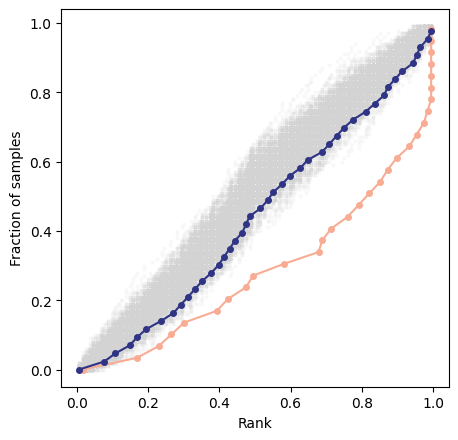

In [12]:
plt.subplots(figsize=(5,5), dpi=100)
plt.rcParams["font.size"] = 6
x1, x2, p1, p2 = plot_gene_site_rank(dna_df, tpm_df, "RNA")
plt.xlabel("Rank")
plt.ylabel("Fraction of samples")

Text(0, 0.5, 'Fraction of samples')

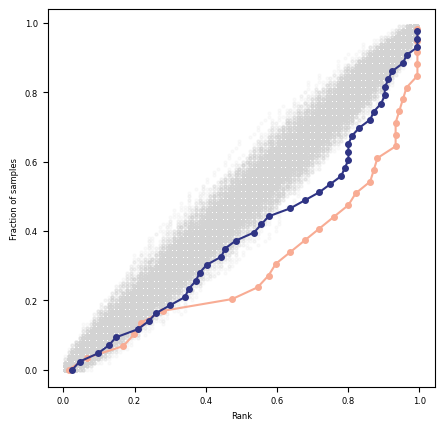

In [13]:
plt.subplots(figsize=(5,5), dpi=100)
plt.rcParams["font.size"] = 6
x1, x2, p1, p2 = plot_gene_site_rank(dna_df, cnv_df.abs(), "DNA")
plt.xlabel("Rank")
plt.ylabel("Fraction of samples")

In [14]:
rna_df = pd.read_excel("data/Supplemental_Tables.xlsx", sheet_name="Table S3", skiprows=[0,1, 2])
rna_df

,Sample,HPV type integrated,HPV integration location,Human chromosome integrated,Human integration location,Human integration strand,Integration type,Reads
0,MOCC-0001-B,HPV16,3357,chr2,200859680,-,human-hpv,660
1,MOCC-0001-B,HPV16,3357,chr2,201045496,-,human-hpv,283
2,MOCC-0001-B,HPV16,3357,chr2,201071610,-,human-hpv,162
3,MOCC-0001-B,HPV16,409,chr2,201071610,-,human-hpv,122
4,MOCC-0001-B,HPV16,409,chr2,201045496,-,human-hpv,98
...,...,...,...,...,...,...,...,...
383,MOCC-0034-B,HPV58,232,chr4,150415590,-,hpv-human,27
384,MOCC-0034-B,HPV58,3636,chr4,150852370,-,human-hpv,11
385,MOCC-0034-B,HPV58,3666,chr4,150852348,-,human-hpv,21
386,MOCC-0034-B,HPV58,3724,chr4,150852348,-,human-hpv,11


In [15]:
def get_gene_fold_change(gene_df, tpm_df, cnv_df, pseudo_count=0.1):
    
    r_fold_changes = []
    d_fold_changes = []
    p_fold_changes = []
    samples = cnv_df.columns
    for i in gene_df.index:
        sample = gene_df.loc[i, "sample"]
        gene = gene_df.loc[i, "gene"]
    
        case_samples = gene_df[gene_df["gene"] == gene]["sample"].to_list()
        case_tpm = tpm_df.loc[gene, sample]
        case_cnv = abs(cnv_df.loc[gene, sample])
            
        control_tpm = tpm_df.loc[gene, [j for j in samples if j not in case_samples]]
        control_cnv = cnv_df.loc[gene, [j for j in samples if j not in case_samples]]
        fc1 = np.log2((case_tpm+pseudo_count)/np.mean(control_tpm+pseudo_count))
        fc2 = np.log2((2**case_cnv)/(np.mean([2**i for i in control_cnv])))
        #fc2 = np.log2((case_cnv+pseudo_count)/np.mean(control_cnv+pseudo_count))
        r_fold_changes.append(fc1)
        d_fold_changes.append(fc2)
    
    gene_df["r_fc"] = r_fold_changes
    gene_df["d_fc"] = d_fold_changes

    return gene_df

In [16]:

def get_integrate_site_gene(df, length):
    
    _df_dict = {"sample":[], "gene": [], "type": [], "exp": []}

    for i in df.index: 
        _ctg = df.loc[i, "Human chromosome integrated"]
        _start = int(df.loc[i, "Human integration location"])
        _sample = df.loc[i, "Sample"]
        _strand = df.loc[i, "Human integration strand"]
        _exp = df.loc[i, "Inregration status"]
        
        genes = hg38.genes_at(_ctg, _start-length, _start+length,cds=True)
            
        anno =  hg38.annotate_position(_ctg, _start, _strand, cds=True)
        
        if len(anno) > 1:
            print(anno)
        
        for gene in genes:
            name = gene.gene_name
            if "." in name:
                continue
            if gene != anno[0][0]:
                t = "near"
            else:
                t = anno[0][1]
            _df_dict["sample"].append(_sample)
            _df_dict["gene"].append(name)
            _df_dict["type"].append(t)
            _df_dict["exp"].append(_exp)
    
    _df = pd.DataFrame.from_dict(_df_dict)
    
    r = {"sample":[], "gene": [], "type": [], "exp": []}
    
    for i, d in _df.groupby(["sample", "gene"]):
        if "Productive" in d["exp"].to_list():
            exp = "Y"
        else:
            exp = "N"
        
        if "exonic" in d["type"].to_list():
            t = "exonic"
        elif "intronic" in d["type"].to_list():
            t = "intronic"
        else:
            t = "near"
        r["sample"].append(d["sample"].to_list()[0])
        r["gene"].append(d["gene"].to_list()[0])
        r["type"].append(t)
        r["exp"].append(exp)
        
    return pd.DataFrame.from_dict(r)
                
        

In [17]:
gene_df = get_integrate_site_gene(dna_df, 40000)
gene_df[:5]

[(Gene(gene_id='ENSG00000177103.15', gene_name='DSCAML1', biotype='protein_coding', contig='chr11', start=117427772, end=117817525, strand='-', genome='hg38'), 'intronic'), (Gene(gene_id='ENSG00000137731.14', gene_name='FXYD2', biotype='protein_coding', contig='chr11', start=117800844, end=117828698, strand='-', genome='hg38'), 'intronic')]
[(Gene(gene_id='ENSG00000177103.15', gene_name='DSCAML1', biotype='protein_coding', contig='chr11', start=117427772, end=117817525, strand='-', genome='hg38'), 'intronic'), (Gene(gene_id='ENSG00000137731.14', gene_name='FXYD2', biotype='protein_coding', contig='chr11', start=117800844, end=117828698, strand='-', genome='hg38'), 'exonic')]
[(Gene(gene_id='ENSG00000177103.15', gene_name='DSCAML1', biotype='protein_coding', contig='chr11', start=117427772, end=117817525, strand='-', genome='hg38'), 'intronic'), (Gene(gene_id='ENSG00000137731.14', gene_name='FXYD2', biotype='protein_coding', contig='chr11', start=117800844, end=117828698, strand='-', ge

,sample,gene,type,exp
0,MOCC-0001-B,ATP5F1D,near,N
1,MOCC-0001-B,BZW1,near,Y
2,MOCC-0001-B,CBARP,near,Y
3,MOCC-0001-B,CLK1,intronic,Y
4,MOCC-0001-B,FAM126B,intronic,Y


In [18]:
get_gene_fold_change(gene_df, tpm_df, cnv_df, pseudo_count=0.1)

,sample,gene,type,exp,r_fc,d_fc
0,MOCC-0001-B,ATP5F1D,near,N,-0.276371,0.610616
1,MOCC-0001-B,BZW1,near,Y,0.193935,0.470262
2,MOCC-0001-B,CBARP,near,Y,-0.219105,0.610616
3,MOCC-0001-B,CLK1,intronic,Y,1.149005,0.459055
4,MOCC-0001-B,FAM126B,intronic,Y,3.401300,0.460028
...,...,...,...,...,...,...
403,MOCC-002S-B,MACROD2,intronic,Y,-0.218843,-0.032186
404,MOCC-002T-B,GREB1,near,Y,4.058140,0.116067
405,MOCC-0032-B,KDM7A,near,N,-2.096093,0.425453
406,MOCC-0032-B,PRKG1,intronic,Y,-1.306698,0.275241


(-4.8364911178609065, 11.062288942744699)

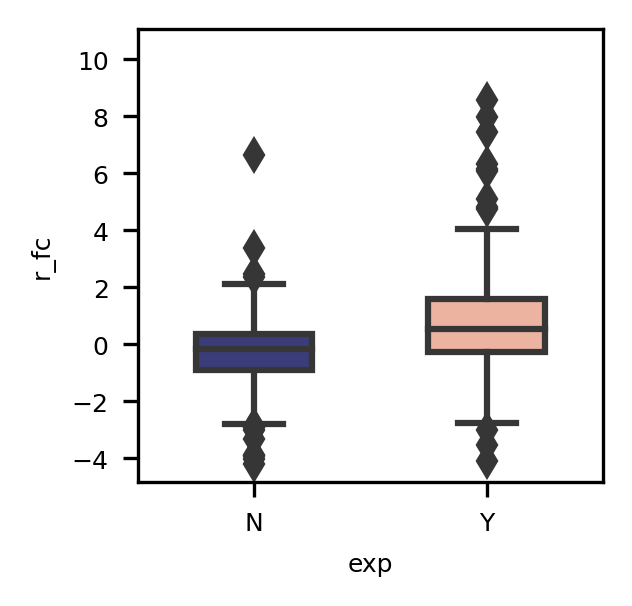

In [19]:
plt.subplots(figsize=(2,2), dpi=300)
ax = sb.boxplot(data=gene_df,x="exp", y="r_fc", palette=[ "#2f3484", "#f8ac94",], width=0.5)
y1, y2 = ax.get_ylim()
ax.set_ylim([y1, y2*1.2])

(-0.4424779316041363, 2.3954215190912485)

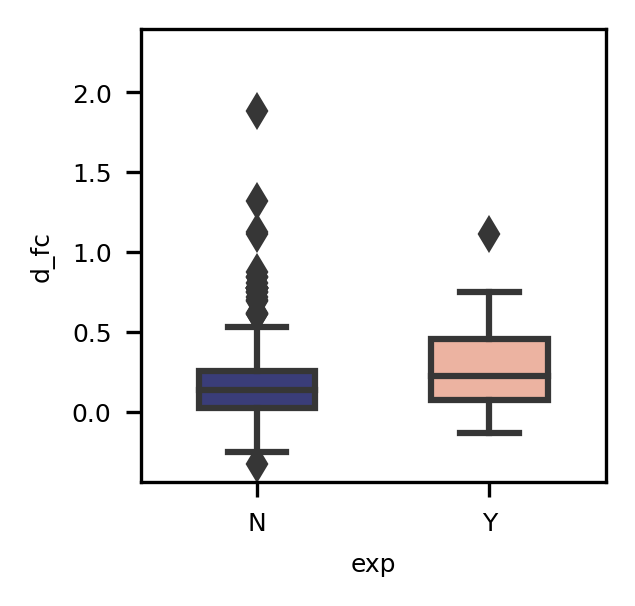

In [20]:
plt.subplots(figsize=(2,2), dpi=300)
ax = sb.boxplot(data=gene_df,x="exp", y="d_fc", palette=["#2f3484","#f8ac94", ], width=0.5)
y1, y2 = ax.get_ylim()
ax.set_ylim([y1, y2*1.2])

In [21]:
def get_affect_gene(df, length):

    gene_dict = {}
    
    r = {}
    
    for i in df.index: 
        _ctg = df.loc[i, "Human chromosome integrated"]
        _start = int(df.loc[i, "Human integration location"])
        _sample = df.loc[i, "Sample"]
        _strand = df.loc[i, "Human integration strand"]
        
        genes = hg38.genes_at(_ctg, _start-length, _start+length, cds=True)
            
        anno =  hg38.annotate_position(_ctg, _start, _strand,  cds=True)
        
        if len(anno) > 1:
            print(anno)
        
        for g, t in anno:
            if t == "intergenic":
                pass
            else:
                name = g.gene_name
                if name not in r:
                    r[name] = { 
                    "exonic": set(),
                    "intronic": set(),
                    "near": set()
                    }
                r[name][t].add(_sample)
        
        for gene in genes:
            name = gene.gene_name
            if name not in r:
                r[name] = { 
                "exonic": set(),
                "intronic": set(),
                "near": set()
                }
                
            if gene not in [j[0] for j in anno]:
                
                r[name]["near"].add(_sample)
                 
    return r

affect_dict = get_affect_gene(rna_df, 40000)

samples = []
genes = []
aff_fc = []
t = []
up_gene = []
down_gene = []

for k, v in affect_dict.items():
    case_samples = v["exonic"] | v["intronic"] | v["near"]
    ct = np.median(tpm_df.loc[k , ~tpm_df.columns.isin(case_samples)].to_list())
    if v["exonic"]:
        case = tpm_df.loc[k , v["exonic"]]
        fc = np.log2((case+1)/(ct+1))
        aff_fc += fc.to_list()
        samples += list(v["exonic"])
        genes += [k] * len(case)
        if any(fc >= 1):
            up_gene.append(k)
        
        if any(fc <= -1):
            down_gene.append(k)
        t += ["exonic"]*len(case)
    if v["intronic"]:
        case = tpm_df.loc[k , v["intronic"]]
       
        fc = np.log2((case+0.1)/(ct+0.1))
        aff_fc += fc.to_list()
        if any(fc >= 1):
            up_gene.append(k)
        
        if any(fc <= -1):
            down_gene.append(k)
        t += ["intronic"]*len(case)
        samples += list(v["intronic"])
        genes += [k] * len(case)
    if v["near"]:
        case = tpm_df.loc[k , v["near"]]
        
        fc = np.log2((case+0.1)/(ct+0.1))
        aff_fc += fc.to_list()
        if any(fc >= 1):
            up_gene.append(k)
        
        if any(fc <= -1):
            down_gene.append(k)
        t += ["near"]*len(case)
        samples += list(v["near"])
        genes += [k] * len(case)

def get_rna_site_gene(df, length):
    
    _df_dict = {"sample":[], "gene": [], "type": []}

    for i in df.index: 
        _ctg = df.loc[i, "Human chromosome integrated"]
        _start = int(df.loc[i, "Human integration location"])
        _sample = df.loc[i, "Sample"]
        _strand = df.loc[i, "Human integration strand"]
        
        genes = hg38.genes_at(_ctg, _start-length, _start+length, cds=True)
            
        anno =  hg38.annotate_position(_ctg, _start, _strand, cds=True)
        
        if len(anno) > 1:
            print(anno)
        
        for gene in genes:
            name = gene.gene_name
            if "." in name:
                continue
            if gene != anno[0][0]:
                t = "near"
            else:
                t = anno[0][1]
            _df_dict["sample"].append(_sample)
            _df_dict["gene"].append(name)
            _df_dict["type"].append(t)
    
    _df = pd.DataFrame.from_dict(_df_dict)
    
    r = {"sample":[], "gene": [], "type": []}
    
    for i, d in _df.groupby(["sample", "gene"]):
        
        if "exonic" in d["type"].to_list():
            t = "exonic"
        elif "intronic" in d["type"].to_list():
            t = "intronic"
        else:
            t = "near"
        r["sample"].append(d["sample"].to_list()[0])
        r["gene"].append(d["gene"].to_list()[0])
        r["type"].append(t)
        
    return pd.DataFrame.from_dict(r)
                
        
gene_df = get_rna_site_gene(rna_df, 40000)
get_gene_fold_change(gene_df, tpm_df, cnv_df, pseudo_count=0.1)

,sample,gene,type,r_fc,d_fc
0,MOCC-0001-B,BZW1,near,0.193935,0.470262
1,MOCC-0001-B,CBARP,near,-0.219105,0.610616
2,MOCC-0001-B,CLK1,exonic,1.149005,0.459055
3,MOCC-0001-B,FAM126B,exonic,3.401300,0.460028
4,MOCC-0001-B,NDUFB3,near,-0.594433,0.608733
...,...,...,...,...,...
127,MOCC-002R-B,RIPK4,near,0.382627,-0.000347
128,MOCC-002S-B,MACROD2,intronic,-0.241364,-0.035799
129,MOCC-002T-B,GREB1,near,4.058140,0.116067
130,MOCC-0032-B,PRKG1,near,-1.306698,0.275241


(-4.719605705301833, 11.05508286109964)

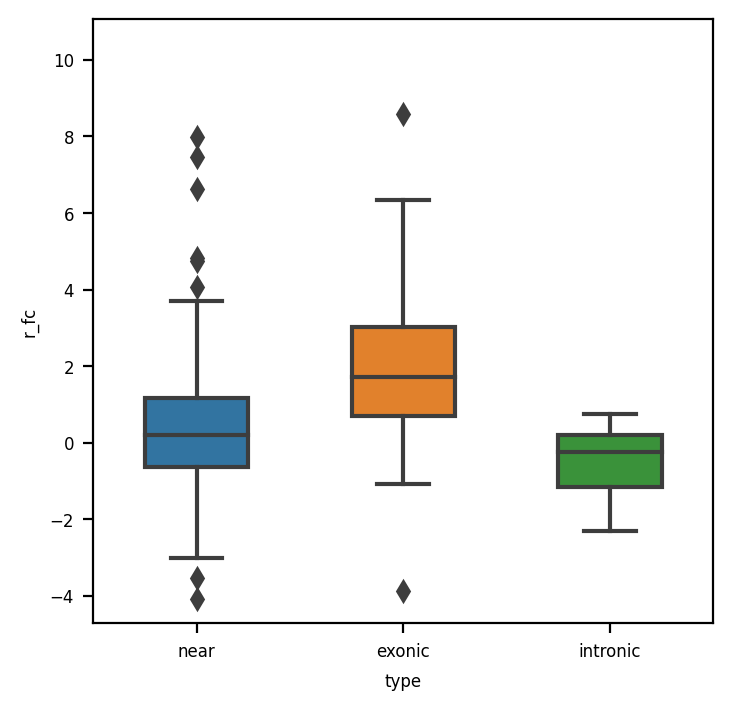

In [22]:
plt.subplots(figsize=(4,4), dpi=200)
ax = sb.boxplot(data=gene_df, x="type", y="r_fc", width=0.5)
#sb.swarmplot(data=gene_df, x="type", y="r_fc", size=4, marker="o", color="black", dodge=True)
y1, y2 = ax.get_ylim()
ax.set_ylim([y1, y2*1.2])